<center> 
<h1> Mehrgittermethoden </h1> 
<h2> Übungsaufgaben </h2>
<h3> Robert Speck & Dieter Moser, Sommersemester 2016 </h3>
</center>
___


### Der FMG-Zyklus ###

Implementieren Sie entweder die rekursive oder die nicht-rekursive Version des FMG-Prediktors mit anschließenden V-Zyklen. Fügen Sie die Funktionalität in die `MyMultigrid`-Klasse ein. Stellen Sie die Entwicklung des Fehlers für das Poisson-Problem grafisch dar, indem Sie für jedes Level (z.B. nach der Grobgitter-Korrektur) den Fehler über die Freiheitsgrade plotten. 

Vergleichen Sie den Fehler mit dem Diskretisierungsfehler des Laplace-Operators und mit dem Fehler von $k$ V-Zyklen.

nlevels: 10
using ones


fmg cycle:  [0.03125, 0.0091628086419753146, 0.0027178500588494331, 0.00073853156890231475, 0.00018953210028019307, 4.7821982282481024e-05, 1.2015977491272589e-05, 3.0192634137143903e-06, 7.5730603436158228e-07, 7.3573055783121566e-08]
v-cycles:  [0.098004893296774295, 0.0085689709140502335, 0.00074977533459756607, 6.5637753520086939e-05, 5.7488367439240129e-06, 5.0373676370452092e-07, 4.4158954368156422e-08, 3.8727498430368712e-09, 3.3978761471153973e-10, 2.9826432990098795e-11]
diskfehler:  4.56162885243e-14


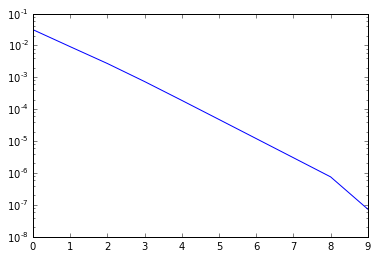

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse.linalg as spLA
import scipy.linalg as LA

from project.mymultigrid import MyMultigrid
from project.poisson1d import Poisson1D
from project.linear_transfer import LinearTransfer
from project.weighted_jacobi import WeightedJacobi



ndofs = 1023
nlevels = int(np.log2(ndofs+1))
print "nlevels:",nlevels
prob = Poisson1D(ndofs=ndofs)

mymg = MyMultigrid(ndofs, nlevels=nlevels)
mymg.attach_transfer(LinearTransfer)
mymg.attach_smoother(WeightedJacobi, prob.A, omega=2.0/3.0)

nu0 = 1
nu1 = 2
nu2 = 2

u = mymg.do_fmg_cycle(prob.rhs, nu1=nu1, nu2=nu2)

def uex(x):
    return -1./2*x**2+1./2*x

errlist=[]
ll=mymg.get_list()
for i in range(np.size(ll)):
    s=np.size(ll[i])
    linsp=np.linspace(0,1,s+2)[1:-1]
    errlist.append(np.linalg.norm(uex(linsp)-ll[i], np.inf))
    
print "fmg cycle: ",errlist

errvlist=[]
ls=np.linspace(0,1, ndofs+2)[1:-1]
k=6
uv=np.sin(np.pi*k*ls)

for i in range(nlevels):
    uv=mymg.do_v_cycle(uv, prob.rhs, nu1=nu1, nu2=nu2, lstart=0)
    errvlist.append(np.linalg.norm(uex(ls)-uv, np.inf))

print "v-cycles: ",errvlist

diskfehler = np.linalg.norm(uex(ls)-spLA.spsolve(prob.A, prob.rhs),np.inf)
print "diskfehler: ", diskfehler
plt.semilogy(errlist)
plt.show()




### Fourier Reihen 

Sei $\{t_k\}_{-\infty}^{\infty}$ eine absolut summierbare Folge, d.h. $\sum_{k=-\infty}^{\infty}|t_k| < \infty$.
Sei desweiteren $f(\lambda) = \lim_{n \to \infty} \sum_{k=-n}^{n}t_k e^{ik\lambda}$.

1. Zeigen Sie, dass $S_n(\lambda) = \sum_{k=-n}^{n}t_k e^{ik\lambda}$ gleichmässig gegen $f(\lambda)$ konvergiert.
1. Folgern Sie, dass $f(\lambda)$ Riemann-integrierbar und beschränkt auf $[0,2\pi]$ ist.
1. Finden Sie mithilfe der inversen Fouriertransformation eine Darstellung von $t_k$ unter Verwendung von $f(\lambda)$.

Wir nennen $f(\lambda)$ eine Funktion der *Wiener Klasse*.


### Über Toeplitz-Matrizen (Teil 1)
Eine Matrix nennt man eine Toeplitz-Matrix falls die Werte auf der Hauptdiagonale und allen Nebendiagonalen konstant sind. Mithilfe einer Funktion der Wiener Klasse $f(\lambda)$ lässt sich die Klasse der Toeplitz-Matrizen
$$ T_n(f) = \{\frac{1}{2 \pi} \int_0^{2\pi} f(\lambda) e^{-i(k-j)\lambda} \mathrm{d}\lambda ; k,j = 0,1,\ldots,n-1\}$$
konstruieren.

1. Welches $f(\lambda)$ und $n$ generiert den zentrierte Finite-Differenzen-Operator 2. Ordnung des Laplace-Operators?
1. Zeigen Sie, dass $T_n(f(\lambda))$ genau dann hermitesch ist wenn $f(\lambda)$ eine reellwertige Funktion ist.
1. Sei $f(\lambda)$ reellwertig und begrenzt durch $m_f \leq f(\lambda) \leq M_f$. Beweisen Sie mithilfe des Rayleigh Koeffizienten, dass für die Eigenwerte $\tau_{n,k}$ von $T_n(f)$ gilt 
    $m_f\leq\tau_{n,k}\leq M_f$.
1. Zeigen Sie für nicht-hermitesche $T_n(f)$, dass die Ungleichung $\| T_n(f) \| \leq M_{|f_r|}+M_{|f_i|} \leq 2 M_{|f|}$ gilt, wobei $f(\lambda) = f_r(\lambda) + i f_i(\lambda)$ mit den reellwertigen Funktionen $f_i,f_r$ aus der Wiener Klasse.

Tipp: Nutzen Sie den Satz von Parseval für $x^* \cdot x$.
